In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
## Matplotlib settings
## inspired by http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
    'figure.dpi': 300,  # to adjust notebook inline plot size
    'savefig.dpi': 300,  # to adjust notebook inline plot size
    'axes.labelsize': 10, # fontsize for x and y labels (was 10)
    'axes.titlesize': 10,
    'font.size': 8, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
#     'figure.figsize': [3.5, 2.625], # 4 x 3
    'figure.figsize': [2, 1.5], # 4 x 3
#     'figure.figsize': [4*1.125, 3*1.125], # 4x3, full slide in keynote
    'font.family': 'serif',
    'figure.max_open_warning':100,
    'axes.formatter.limits' : [-3, 3]
}
mpl.rcParams.update(params)

## Build a thing to move axis multiplier to label
## https://stackoverflow.com/questions/45760763/how-to-move-the-y-axis-scale-factor-to-the-position-next-to-the-y-axis-label
## -----

# import numpy as np
# import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

class Labeloffset():
    def __init__(self,  ax, label="", axis="y"):
        self.axis = {"y":ax.yaxis, "x":ax.xaxis}[axis]
        self.label=label
        ax.callbacks.connect(axis+'lim_changed', self.update)
        ax.figure.canvas.draw()
        self.update(None)

    def update(self, lim):
        fmt = self.axis.get_major_formatter()
        self.axis.offsetText.set_visible(False)
        self.axis.set_label_text(self.label + " (" + fmt.get_offset() + ")" )

    

Want to compare the signal predicted by Oritt to mine

In [3]:
Oritt_data_w_error_bars = np.array([
    [0.19337016574585708, 0.13278084714548744],
    [0.9944751381215471, 0.9888888888888889],
    [2.0276243093922646, 1.9943523634131375],
    [2.0276243093922646, 1.5110190300798036],
    [2.0276243093922646, 2.4610190300798047],
    [3.7182320441988934, 3.2896562308164525],
    [3.7182320441988934, 4.289656230816453],
    [3.7182320441988934, 2.306322897483119],
    [3.6629834254143625, 5.056476365868632],
    [3.674033149171269, 3.773112338858196],
    [3.2762430939226506, 4.00755064456722],
    [3.2762430939226506, 4.290883977900553],
    [3.2762430939226506, 3.7242173112338866],
    [4.082872928176794, 2.8386433394720694],
    [4.093922651933699, 3.5552793124616335],
    [4.093922651933699, 2.1219459791283],
    ])
Oritt_data = np.array([
    [0.19337016574585708, 0.13278084714548744],
    [0.9944751381215471, 0.9888888888888889],
    [2.0276243093922646, 1.9943523634131375],
    [3.7182320441988934, 3.2896562308164525],
    [3.6629834254143625, 5.056476365868632],
    [3.2762430939226506, 4.00755064456722],
    [4.082872928176794, 2.8386433394720694],
    ])
Oritt_y_error = np.array([
    [0.13278084714548744, 0.13278084714548744],
    [0.9888888888888889, 0.9888888888888889],
    [1.5110190300798036, 2.4610190300798047],
    [2.306322897483119, 4.289656230816453],
    [3.773112338858196, 5.056476365868632],
    [3.7242173112338866, 4.290883977900553],
    [2.1219459791283, 3.5552793124616335],
    ])

Text(0.5, 0, '$n \\frac{\\mathrm{d}n}{\\mathrm{d}T} \\frac{1}{C_p}$')

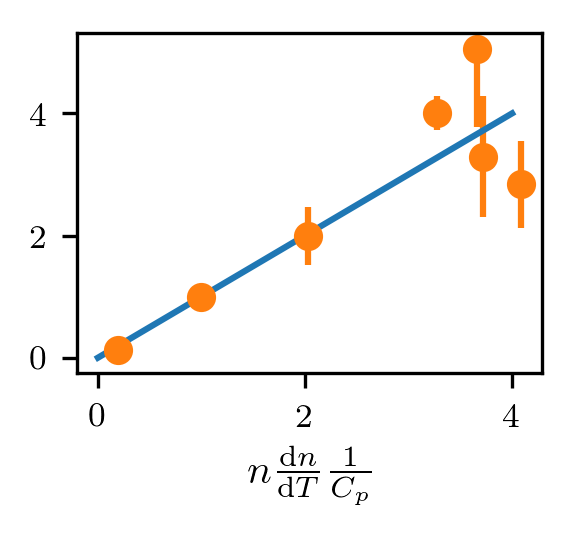

In [4]:
plt.plot([0,4], [0, 4])

plt.errorbar(
    *Oritt_data.T, 
    yerr=np.abs(Oritt_y_error.T-Oritt_data.T[1]), 
    ls='',
    marker='o')
plt.xlabel(r"$n \frac{\mathrm{d}n}{\mathrm{d}T} \frac{1}{C_p}$")

In [5]:
## Parameters from SI of Oritt paper
glycerol_n = 1.473
glycerol_mag_dndt = 2.7e-4
glycerol_cp = 2.6e6

thermo_optical_props = {
    'water' : {
        'n' : 1.33,
        'mag_dndt' : 9e-5,
        'C_p' : 4.2e6,
        'snr_oritt' : 0.13278084714548744,
        'err': np.array([0.13278084714548744, 0.13278084714548744,]),
        },
    'glycerol' : {
        'n' : 1.473,
        'mag_dndt' : 2.7e-4,
        'C_p' : 2.6e6,
        'snr_oritt' : 0.9888888888888889,
        'err': np.array([0.9888888888888889, 0.9888888888888889,]),
        },
    'ethanol' : {
        'n' : 1.36,
        'mag_dndt' : 4.4e-4,
        'C_p' : 1.93e6,
        'snr_oritt' : 1.9943523634131375,
        'err': np.array([1.5110190300798036,  2.4610190300798047,]),
        },
    'hexane' : {
        'n' : 1.37,
        'mag_dndt' : 5.5e-4,
        'C_p' : 1.5e6,
        'snr_oritt' : 4.00755064456722,
        'err': np.array([3.7242173112338866,  4.290883977900553,]),
        },
#     'decane' : {
#         'n' : 1.413,
#         'mag_dndt' : 6.064e-4,
#         'C_p' : 1.61e6,
#         'snr_oritt' : 
#         },
    'pentane' : {
        'n' : 1.358,
        'mag_dndt' : 5.99e-4,
        'C_p' : 1.45e6,
        'snr_oritt' : 5.056476365868632,
        'err': np.array([3.773112338858196,  5.056476365868632]),
        },
    'chloroform' : {
        'n' : 1.45,
        'mag_dndt' : 6.12e-4,
        'C_p' : 1.434e6,
        'snr_oritt' : 2.8386433394720694,
        'err': np.array([2.1219459791283,  3.5552793124616335]),
        },
#     '5CBe' : {
#         'n' : 1.72,
#         'mag_dndt' : 3.01e-3,
#         'C_p' : 2.0e6,
#         'snr_oritt' : 18.054054054054053,
#         'err': np.array([13.621621621621621,  22.486486486486484]),
#         },
#     '5CBo' : {
#         'n' : 1.54,
#         'mag_dndt' : 6.37e-4,
#         'C_p' : 2.0e6,
#         'snr_oritt' : 18.054054054054053,
#         'err': np.array([13.621621621621621,  22.486486486486484]),
#         },
    '5CB' : {
        'n' : (2.7*1.72 + 1.54)/3.7,
        'mag_dndt' : (2.7*3.01e-3 + 6.37e-4)/3.7,
        'C_p' : 2.0e6,
        'snr_oritt' : 18.054054054054053,
        'err': np.array([13.621621621621621,  22.486486486486484]),
        },
    }


In [29]:
def n_cubed_dndt(chem_name):
    n = thermo_optical_props[chem_name]['n']
    dndt = thermo_optical_props[chem_name]['mag_dndt']
    
    return n**3. * dndt

def dndt_on_n(chem_name):
    n = thermo_optical_props[chem_name]['n']
    dndt = thermo_optical_props[chem_name]['mag_dndt']
    
    return 1/n * dndt

def n_dndt(chem_name):
    n = thermo_optical_props[chem_name]['n']
    dndt = thermo_optical_props[chem_name]['mag_dndt']
    
    return n * dndt

def n_dndt_on_cp(chem_name):
    n = thermo_optical_props[chem_name]['n']
    dndt = thermo_optical_props[chem_name]['mag_dndt']
    cp = thermo_optical_props[chem_name]['C_p']
    return n * dndt / cp

def n_cubed_dndt_on_cp(chem_name):
    n = thermo_optical_props[chem_name]['n']
    dndt = thermo_optical_props[chem_name]['mag_dndt']
    cp = thermo_optical_props[chem_name]['C_p']

    return n**3. * dndt / cp

def n_4_dndt_on_cp(chem_name):
    n = thermo_optical_props[chem_name]['n']
    dndt = thermo_optical_props[chem_name]['mag_dndt']
    cp = thermo_optical_props[chem_name]['C_p']

    return n**4. * dndt / cp

Text(0, 0.5, 'SNR [relative to glycerol]')

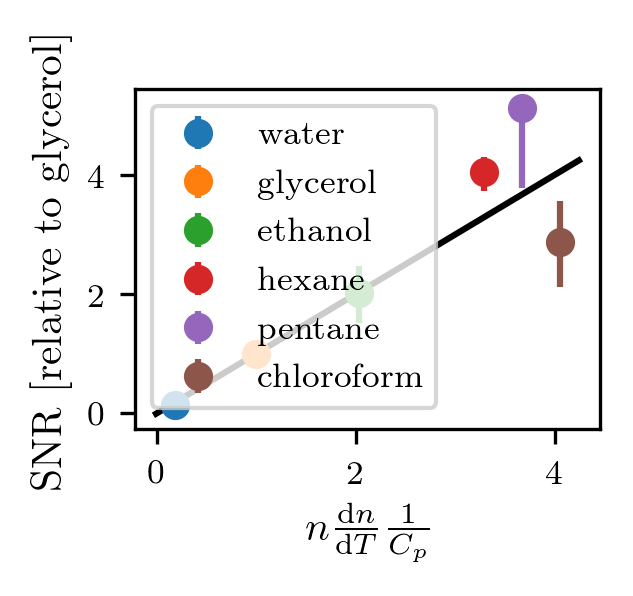

In [8]:
for name in thermo_optical_props.keys():
    
    if name != '5CB': 
        data = (thermo_optical_props[name]['snr_oritt']
                /thermo_optical_props['glycerol']['snr_oritt'])
        plt.errorbar(
            n_dndt_on_cp(name)/n_dndt_on_cp('glycerol'), 
            data,
            yerr=np.abs(
                thermo_optical_props[name]['err']-data)[:,None],
            ls='',
            marker='o',
            label = name)
    
plt.plot(plt.gca().get_xlim(), plt.gca().get_xlim(), c='k')
plt.legend()
plt.xlabel(r"$ n \frac{\mathrm{d}n}{\mathrm{d}T} \frac{1}{C_p}$")
plt.ylabel(r"SNR [relative to glycerol]")

Text(0, 0.5, 'SNR [relative to glycerol]')

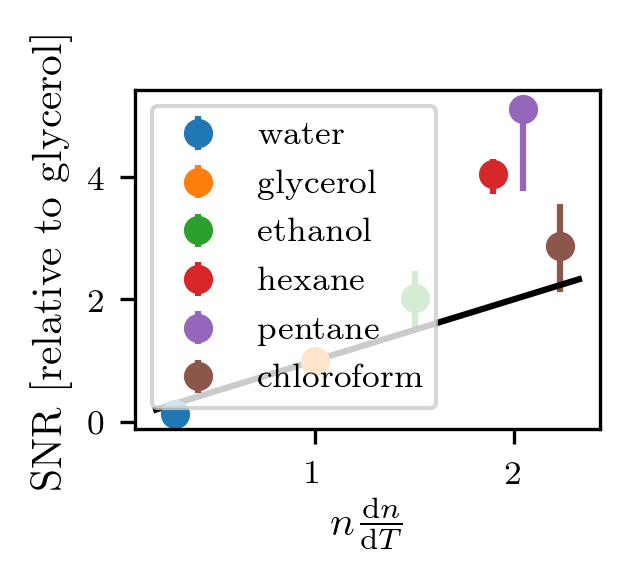

In [9]:
for name in thermo_optical_props.keys():
    
    if name != '5CB': 
        data = (thermo_optical_props[name]['snr_oritt']
                /thermo_optical_props['glycerol']['snr_oritt'])
        plt.errorbar(
            n_dndt(name)/n_dndt('glycerol'), 
            data,
            yerr=np.abs(
                thermo_optical_props[name]['err']-data)[:,None],
            ls='',
            marker='o',
            label = name)
    
plt.plot(plt.gca().get_xlim(), plt.gca().get_xlim(), c='k')
plt.legend()
plt.xlabel(r"$ n \frac{\mathrm{d}n}{\mathrm{d}T}$")
plt.ylabel(r"SNR [relative to glycerol]")

Text(0, 0.5, 'SNR [relative to glycerol]')

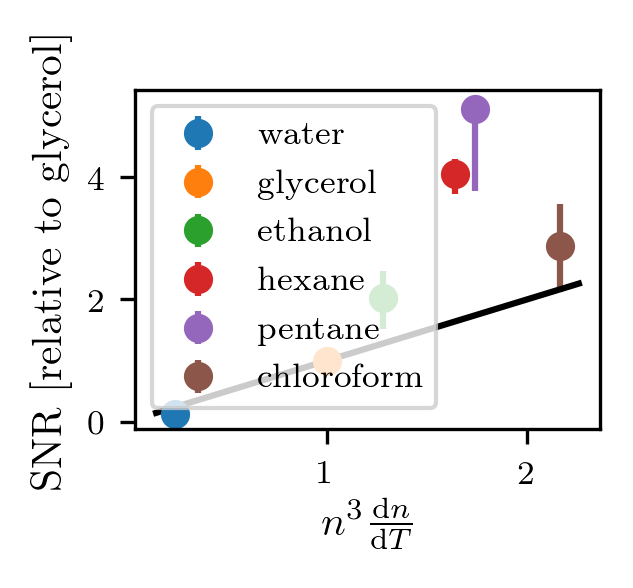

In [10]:
for name in thermo_optical_props.keys():

    if name != '5CB': 

        data = (thermo_optical_props[name]['snr_oritt']
                /thermo_optical_props['glycerol']['snr_oritt'])
        plt.errorbar(
            n_cubed_dndt(name)/n_cubed_dndt('glycerol'), 
            data,
            yerr=np.abs(
                thermo_optical_props[name]['err']-data)[:,None],
            ls='',
            marker='o',
            label = name)
plt.legend()
plt.plot(plt.gca().get_xlim(), plt.gca().get_xlim(), c='k')
plt.xlabel(r"$ n^3 \frac{\mathrm{d}n}{\mathrm{d}T}$")
plt.ylabel(r"SNR [relative to glycerol]")

Text(0, 0.5, 'SNR [relative to glycerol]')

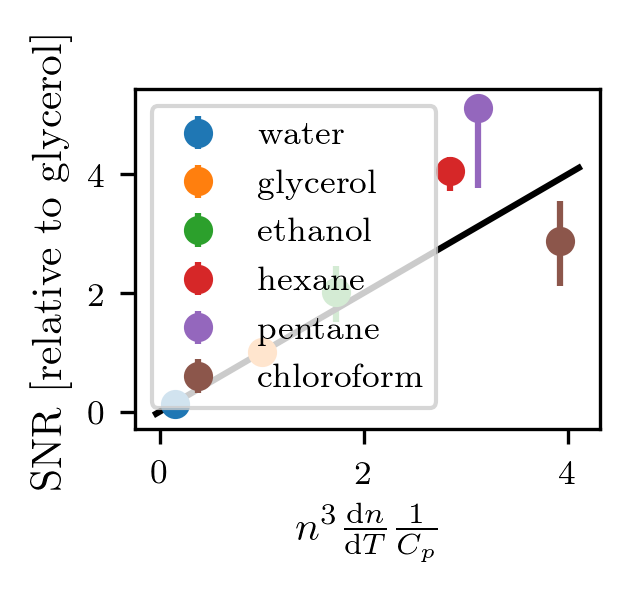

In [11]:
for name in thermo_optical_props.keys():
    
    if name != '5CB': 

        data = (thermo_optical_props[name]['snr_oritt']
                /thermo_optical_props['glycerol']['snr_oritt'])
        plt.errorbar(
            n_cubed_dndt_on_cp(name)/n_cubed_dndt_on_cp('glycerol'), 
            data,
            yerr=np.abs(
                thermo_optical_props[name]['err']-data)[:,None],
            ls='',
            marker='o',
            label = name)
plt.legend()
plt.plot(plt.gca().get_xlim(), plt.gca().get_xlim(), c='k')
plt.xlabel(r"$ n^3 \frac{\mathrm{d}n}{\mathrm{d}T} \frac{1}{C_p}$")
plt.ylabel(r"SNR [relative to glycerol]")

Text(0, 0.5, 'SNR [relative to glycerol]')

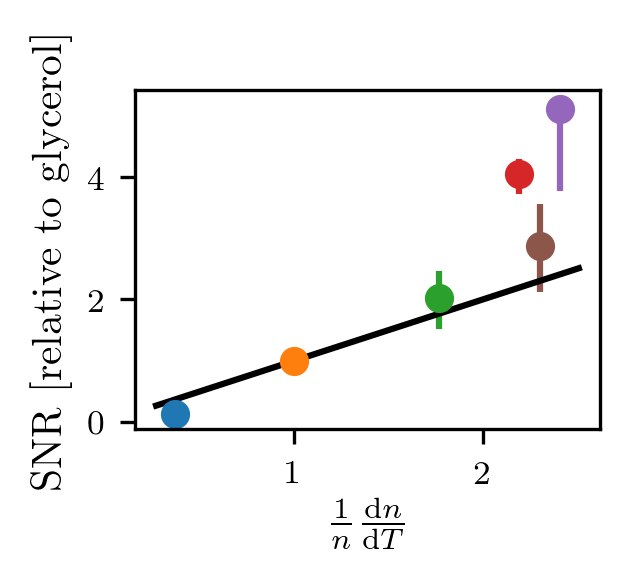

In [12]:
for name in thermo_optical_props.keys():
    if name != '5CB': 

        data = (thermo_optical_props[name]['snr_oritt']
            /thermo_optical_props['glycerol']['snr_oritt'])
        plt.errorbar(
            dndt_on_n(name)/dndt_on_n('glycerol'), 
            data,
            yerr=np.abs(
                thermo_optical_props[name]['err']-data)[:,None],
            ls='',
            marker='o',
            label = name)
    
plt.plot(plt.gca().get_xlim(), plt.gca().get_xlim(), c='k')
plt.xlabel(r"$\frac{1}{n}\frac{\mathrm{d}n}{\mathrm{d}T}$")
plt.ylabel(r"SNR [relative to glycerol]")

0.18631666289507431
1.0
2.0269410249325053
3.28396737991669
3.667460348425772
4.0455456862925185
12.940326760036491


Text(0, 0.5, 'Relative SNR')

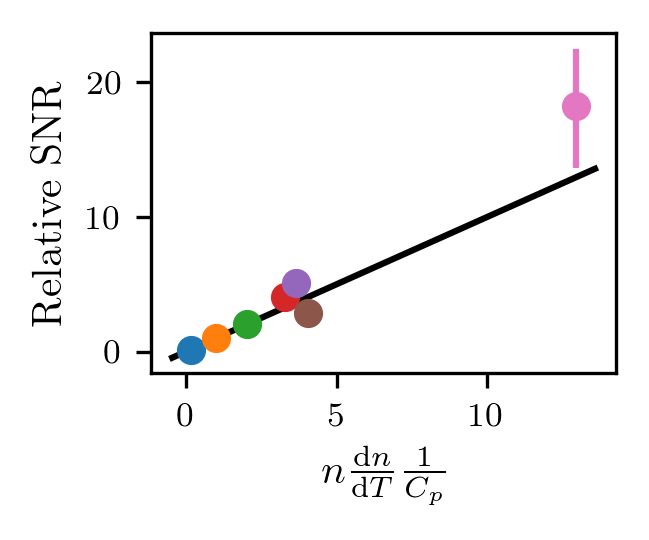

In [28]:
for name in thermo_optical_props.keys():
    
    data = (thermo_optical_props[name]['snr_oritt']
            /thermo_optical_props['glycerol']['snr_oritt'])
    print(n_dndt_on_cp(name)/n_dndt_on_cp('glycerol'))
    plt.errorbar(
        n_dndt_on_cp(name)/n_dndt_on_cp('glycerol'), 
        data,
        yerr=np.abs(
            thermo_optical_props[name]['err']-data)[:,None],
        ls='',
        marker='o',
        label = name)
    
plt.plot(plt.gca().get_xlim(), plt.gca().get_xlim(), c='k')
# plt.legend()
plt.xlabel(r"$ n \frac{\mathrm{d}n}{\mathrm{d}T} \frac{1}{C_p}$")
plt.ylabel(r"Relative SNR")

0.2453722400318564
1.0
1.2826181963543803
1.6388997397740337
1.7384176694047409
2.162138072221257
12.815392461720878


Text(0, 0.5, 'SNR [relative to glycerol]')

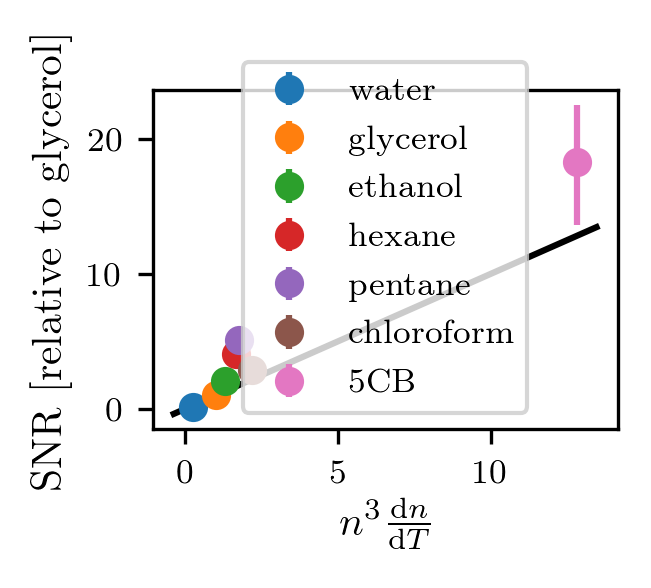

In [14]:
for name in thermo_optical_props.keys():
    
    data = (thermo_optical_props[name]['snr_oritt']
            /thermo_optical_props['glycerol']['snr_oritt'])
    print(n_cubed_dndt(name)/n_cubed_dndt('glycerol'))
    plt.errorbar(
        n_cubed_dndt(name)/n_cubed_dndt('glycerol'), 
        data,
        yerr=np.abs(
            thermo_optical_props[name]['err']-data)[:,None],
        ls='',
        marker='o',
        label = name)
    
plt.plot(plt.gca().get_xlim(), plt.gca().get_xlim(), c='k')
plt.legend()
plt.xlabel(r"$ n^3 \frac{\mathrm{d}n}{\mathrm{d}T}$")
plt.ylabel(r"SNR [relative to glycerol]")

0.2453722400318564
1.0
1.2826181963543803
1.6388997397740337
1.7384176694047409
2.162138072221257
12.815392461720878


Text(0, 0.5, 'SNR [relative to glycerol]')

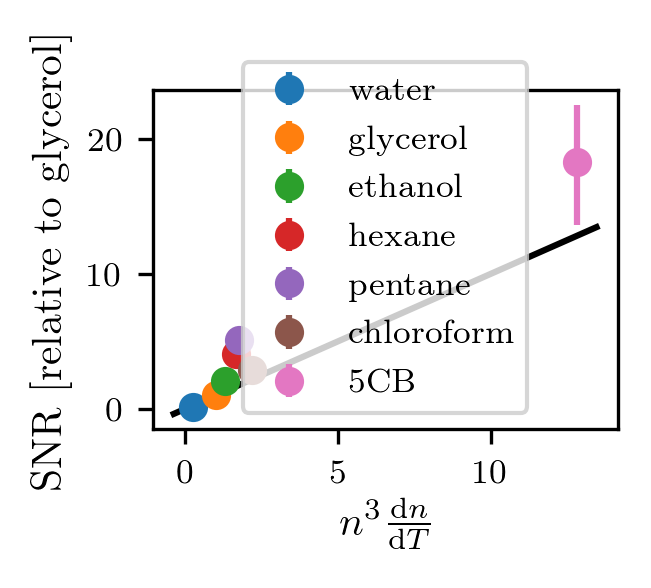

In [14]:
for name in thermo_optical_props.keys():
    
    data = (thermo_optical_props[name]['snr_oritt']
            /thermo_optical_props['glycerol']['snr_oritt'])
    print(n_cubed_dndt(name)/n_cubed_dndt('glycerol'))
    plt.errorbar(
        n_cubed_dndt(name)/n_cubed_dndt('glycerol'), 
        data,
        yerr=np.abs(
            thermo_optical_props[name]['err']-data)[:,None],
        ls='',
        marker='o',
        label = name)
    
plt.plot(plt.gca().get_xlim(), plt.gca().get_xlim(), c='k')
plt.legend()
plt.xlabel(r"$ n^3 \frac{\mathrm{d}n}{\mathrm{d}T}$")
plt.ylabel(r"SNR [relative to glycerol]")

Text(0, 0.5, 'Relative SNR ')

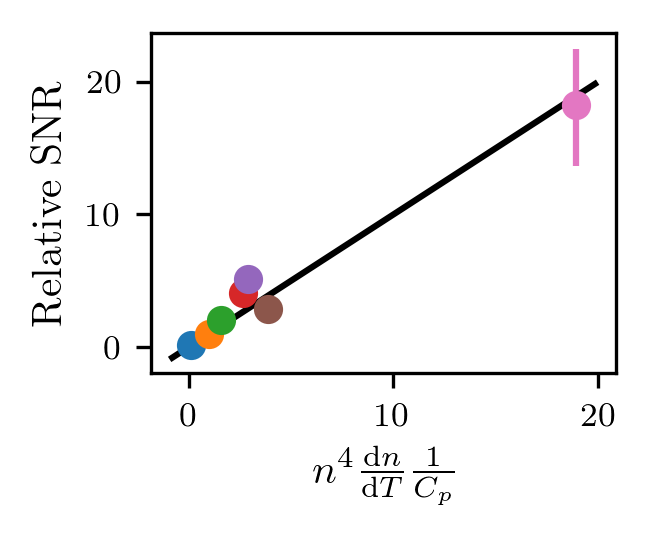

In [32]:
for name in thermo_optical_props.keys():
    
    data = (thermo_optical_props[name]['snr_oritt']
            /thermo_optical_props['glycerol']['snr_oritt'])
    plt.errorbar(
        n_4_dndt_on_cp(name)/n_4_dndt_on_cp('glycerol'), 
        data,
        yerr=np.abs(
            thermo_optical_props[name]['err']-data)[:,None],
        ls='',
        marker='o',
        label = name)
    
plt.plot(plt.gca().get_xlim(), plt.gca().get_xlim(), c='k')
# legend = plt.legend()
plt.xlabel(r"$ n^4 \frac{\mathrm{d}n}{\mathrm{d}T} \frac{1}{C_p}$")
plt.ylabel(r"Relative SNR ")


Text(0, 0.5, 'SNR [relative to glycerol]')

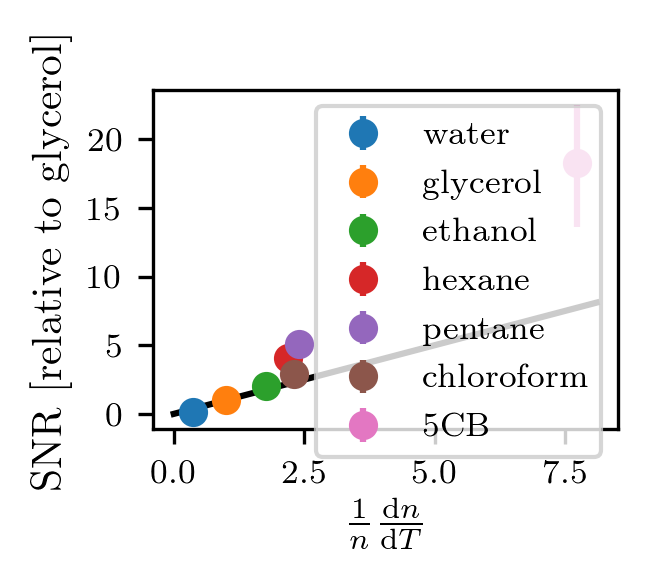

In [16]:
for name in thermo_optical_props.keys():
#     plt.scatter(
#         dndt_on_n(name)/dndt_on_n('glycerol'), 
#         (thermo_optical_props[name]['snr_oritt']
#             /thermo_optical_props['glycerol']['snr_oritt']),
#         label = name)
    data = (thermo_optical_props[name]['snr_oritt']
        /thermo_optical_props['glycerol']['snr_oritt'])
    plt.errorbar(
        dndt_on_n(name)/dndt_on_n('glycerol'), 
        data,
        yerr=np.abs(
            thermo_optical_props[name]['err']-data)[:,None],
        ls='',
        marker='o',
        label = name)
    
plt.plot(plt.gca().get_xlim(), plt.gca().get_xlim(), c='k')
plt.legend()

plt.xlabel(r"$\frac{1}{n}\frac{\mathrm{d}n}{\mathrm{d}T}$")
plt.ylabel(r"SNR [relative to glycerol]")